In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_1 = pd.read_csv('train.csv')

df_1.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [22]:
df_1.dtypes

id          int64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
target    float64
dtype: object

In [23]:
cols = df_1.drop(['id', 'target'], axis=1).columns

In [24]:
cols

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

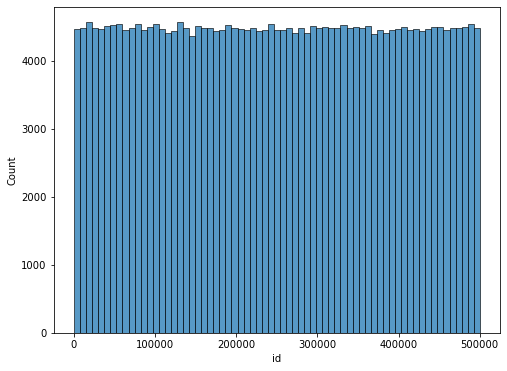

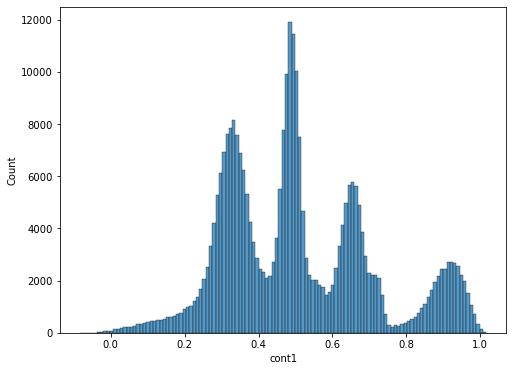

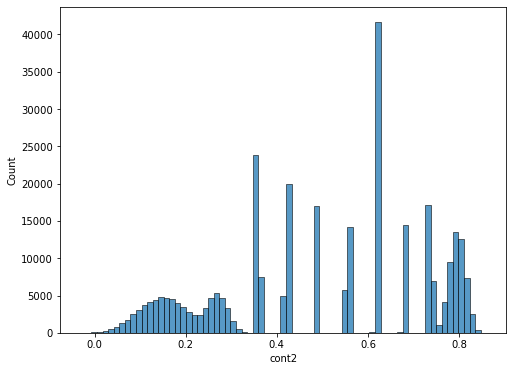

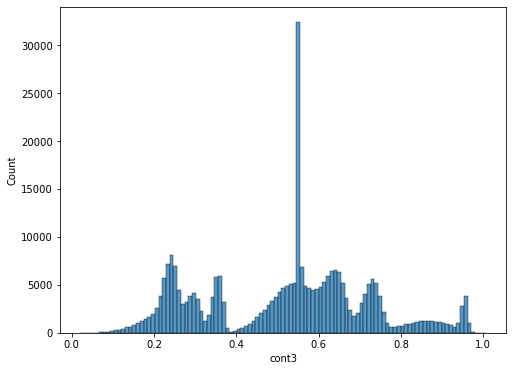

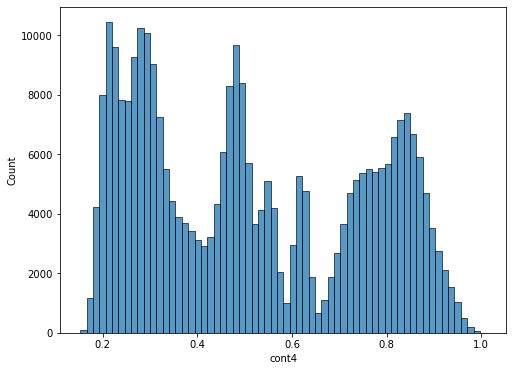

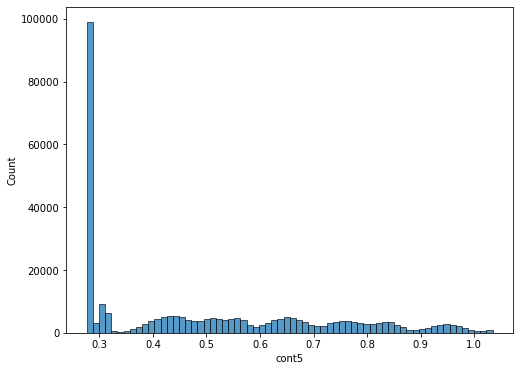

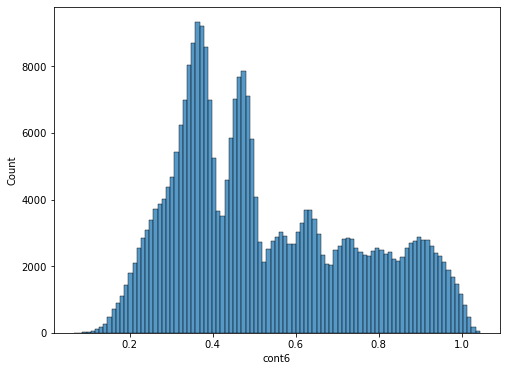

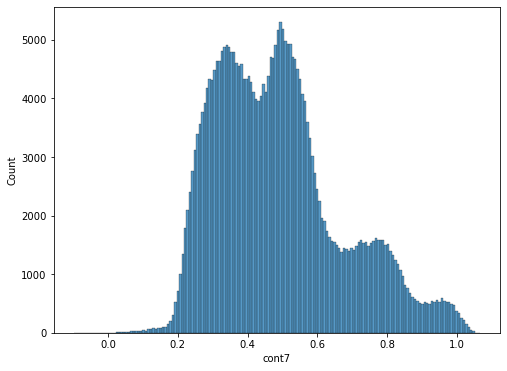

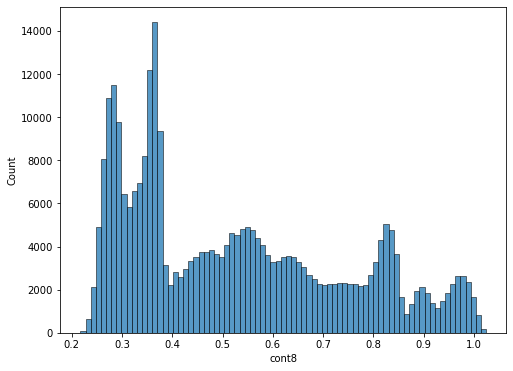

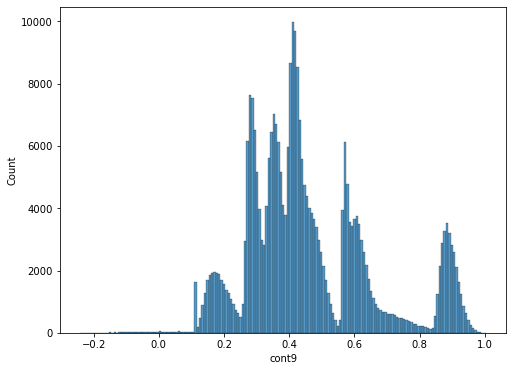

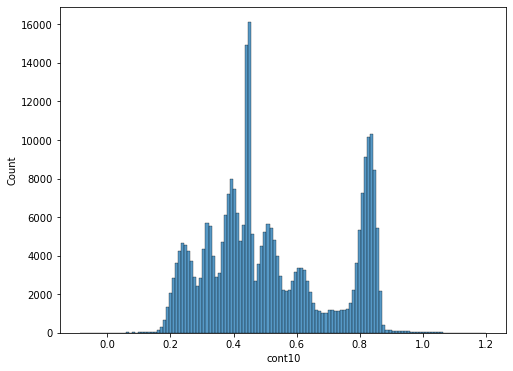

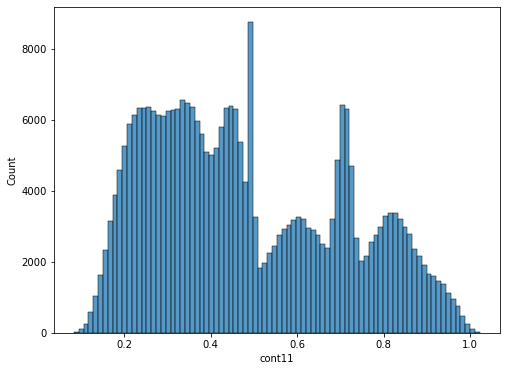

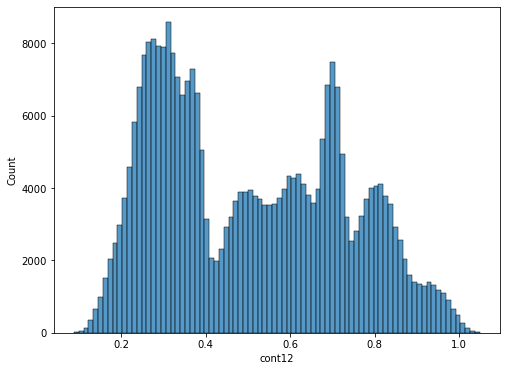

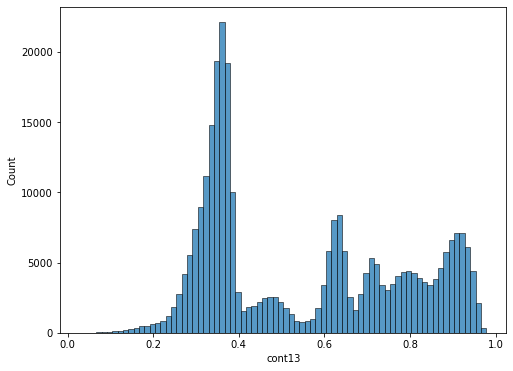

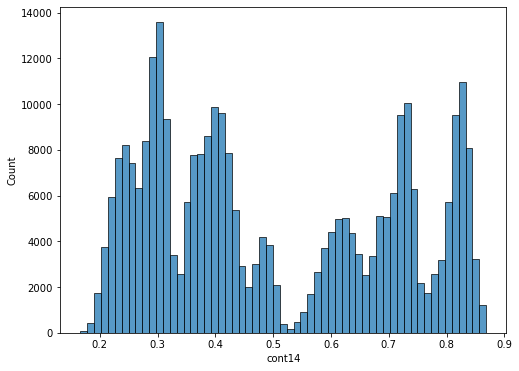

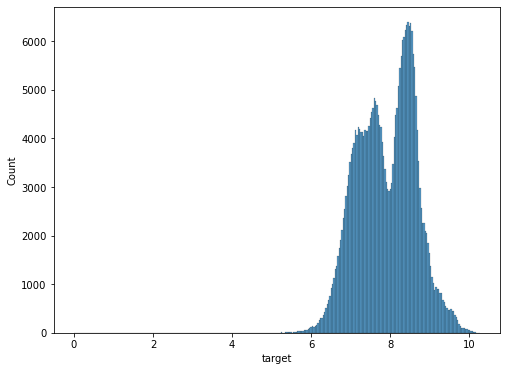

In [26]:
for col in df_1.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data = df_1[col])
    plt.show()

In [47]:
df_2 = df_1.copy(deep = True)
df_2.describe()

from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
df_2[cols] = sclr.fit_transform(df_1[cols])

df_2.describe()

df_2.min()

id        1.0
cont1     0.0
cont2     0.0
cont3     0.0
cont4     0.0
cont5     0.0
cont6     0.0
cont7     0.0
cont8     0.0
cont9     0.0
cont10    0.0
cont11    0.0
cont12    0.0
cont13    0.0
cont14    0.0
target    0.0
dtype: float64

In [50]:
df_3 = df_2 + np.abs(df_2.min()) + 1e-6

# df_3.describe()`
# df_3.min()

# df_3[df_3<0].sum()

from scipy import stats

for col in cols:
    df_3[col] = stats.boxcox(df_2[col])

ValueError: Data must be positive.